# Gradiente Descendente en Optimización

## Parte A: Implementación de Gradiente Descendente en 3-D

Se implementará el método de Gradiente Descendiente para minimizar la función de pérdida 
$$
L(x,y) = (x-2)^2 + (y-1)^2
$$
simulando el entrenamiento de una red neuronal con dos parámetros.

### 1. Calcular analíticamente el gradiente de la función de pérdida

Para calcular el gradiente procedemos a calcular la derivada parcial de $L$ con respecto a $x$ y $y$

$$
\frac{\partial}{\partial x}((x-2)^2 + (y-1)^2)
$$
$$
\frac{\partial}{\partial y}((x-2)^2 + (y-1)^2)
$$

Con esto realizamos el calculo de cada derivada parcial y obtenemos que el gradiente de la función de perdida L es:
$$
\nabla L = \begin{bmatrix}
2x-4 \\
2y-2 \\
\end{bmatrix}
$$


### 2. Implementar el algoritmo de Gradiente Descendente

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función de pérdida
def L(x, y):
    return (x - 2)**2 + (y + 1)**2

# Definición del gradiente de L (derivadas parciales)
def grad_L(point):
    x, y = point
    grad_x = 2 * (x - 2)   # ∂L/∂x = 2(x - 2)
    grad_y = 2 * (y + 1)   # ∂L/∂y = 2(y + 1)
    return np.array([grad_x, grad_y])

# Implementación del algoritmo de Gradiente Descendente
def gradient_descent(initial_point, alpha=0.1, tol=1e-6, max_iter=1000):
    xk = np.array(initial_point, dtype=float)
    history = [xk.copy()]
    
    for i in range(max_iter):
        grad = grad_L(xk)
        
        if np.linalg.norm(grad) < tol:
            print(f"Convergencia alcanzada en la iteración {i}.")
            break
        # Actualizacion del punto usando la regla: x_{k+1} = x_k - alpha * gradiente
        xk = xk - alpha * grad
        history.append(xk.copy())
    
    return xk, history

# Parámetros iniciales
initial_point = [0, 0]
alpha = 0.1
tol = 1e-6
max_iter = 100

min_point, trajectory = gradient_descent(initial_point, alpha, tol, max_iter)
print("El mínimo aproximado se encontró en:", min_point)

Convergencia alcanzada en la iteración 69.
El mínimo aproximado se encontró en: [ 1.99999959 -0.99999979]


### 3. Experimentar con diferentes valores para el parámetro de paso $\alpha$

In [11]:
# Parámetros iniciales
initial_point = [0, 0]
alpha = 0.2
tol = 1e-6
max_iter = 100

min_point, trajectory = gradient_descent(initial_point, alpha, tol, max_iter)
print("El mínimo aproximado se encontró en:", min_point)

Convergencia alcanzada en la iteración 30.
El mínimo aproximado se encontró en: [ 1.99999956 -0.99999978]


In [7]:
# Parámetros iniciales
initial_point = [0, 0]
alpha = 0.3
tol = 1e-6
max_iter = 100

min_point, trajectory = gradient_descent(initial_point, alpha, tol, max_iter)
print("El mínimo aproximado se encontró en:", min_point)

Convergencia alcanzada en la iteración 17.
El mínimo aproximado se encontró en: [ 1.99999966 -0.99999983]


In [32]:
# Parámetros iniciales
initial_point = [0, 0]
alpha = 0.5
tol = 1e-6
max_iter = 100

min_point, trajectory = gradient_descent(initial_point, alpha, tol, max_iter)
print("El mínimo aproximado se encontró en:", min_point)

Convergencia alcanzada en la iteración 1.
El mínimo aproximado se encontró en: [ 2. -1.]


In [50]:
# Parámetros iniciales
initial_point = [0, 0]
alpha = 0.7
tol = 1e-6
max_iter = 100

min_point, trajectory = gradient_descent(initial_point, alpha, tol, max_iter)
print("El mínimo aproximado se encontró en:", min_point)

Convergencia alcanzada en la iteración 17.
El mínimo aproximado se encontró en: [ 2.00000034 -1.00000017]


Podemos ver que a medida que el $\alpha$ se acerca a 0.5, se haya la convergencia en menor cantidad de iteraciones y la precision con respecto al minimo global que conocemos [2, -1], aumenta. Por ejemplo, con un $\alpha = 0.2$ se encontró un minimo aproximado en [ 1.99999956 -0.99999978], mientras que con un $\alpha = 0.5$ se encontró un minimo aproximado en [ 2. -1.], mostrando una mayor precision en el segundo caso.

### Graficar la trayectoria de los parámetros durante la optimizació

In [48]:
# Parámetros iniciales
initial_point = [0, 0]
alpha = 0.5
tol = 1e-6
max_iter = 100

min_point, trajectory = gradient_descent(initial_point, alpha, tol, max_iter)
print("El mínimo aproximado se encontró en:", min_point)

Convergencia alcanzada en la iteración 1.
El mínimo aproximado se encontró en: [ 2. -1.]


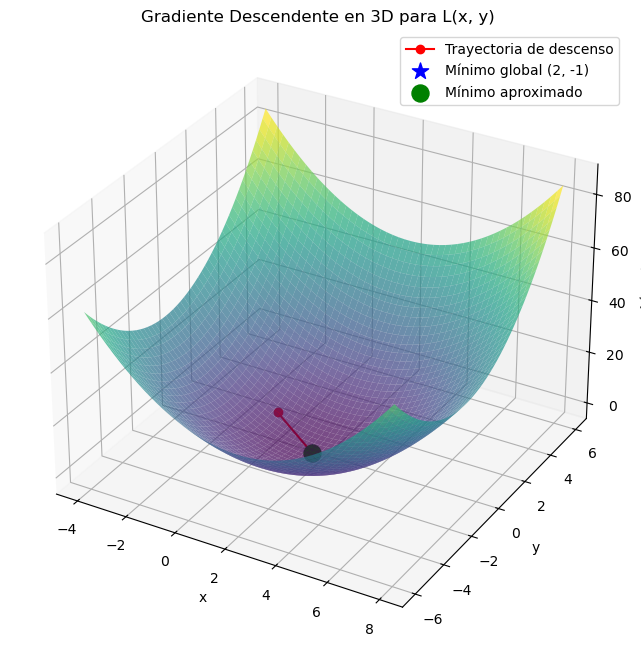

In [49]:
# Convertir la trayectoria a un arreglo para graficar
trajectory = np.array(trajectory)
x_vals = trajectory[:, 0]
y_vals = trajectory[:, 1]
z_vals = L(x_vals, y_vals)  # Evaluar la función en los puntos de la trayectoria

# Crear una malla para graficar la superficie de L(x, y)
x_range = np.linspace(-4, 8, 400)
y_range = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = L(X, Y)

# Graficación 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

# Graficar la trayectoria del gradiente descendente en 3D
ax.plot3D(x_vals, y_vals, z_vals, marker='o', color='red', label='Trayectoria de descenso')

# Marcar el mínimo global conocido (2, -1, L(2,-1)=0)
ax.scatter(2, -1, L(2, -1), color='blue', marker='*', s=150, label='Mínimo global (2, -1)')

# Marcar el mínimo aproximado obtenido por el algoritmo
ax.scatter(min_point[0], min_point[1], L(min_point[0], min_point[1]), color='green', marker='o', s=150, label='Mínimo aproximado')

# Etiquetas y título
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('L(x, y)')
ax.set_title('Gradiente Descendente en 3D para L(x, y)')

# Leyenda
ax.legend()

plt.show()

### 5. Destacar el valor óptimo final y compararlo con la solución analítica

Podemos ver que en ambos casos, se encuentra el mismo minimo global (2,-1). Sin embargo, el metodo del gradiente descendente puede llegar a variar un poco en su precision dependiendo de $\alpha$. Podemos ver que cuando $\alpha \neq 0.5$ lograba encontrar un punto extremadamente cercano al minimo global conocido pero no exactamente el mismo.

### 6. Analizar la sensibilidad del método al valor de α y discutir estrategias para su selección óptima

El metodo del gradiente descendiente tiene una alta sensibilidad al parametro $\alpha$. Como se analizó anteriormente, a medida que este valor se alejaba de 0.5 aumentaban las iteraciones para encontrar el minimo y reducia la precision con respecto al minimo aproximado y al minimo global concido. Para poder encontrar el $\alpha$ optimo se podria realizar un Grid Search para encontrar el mejor $\alpha$ para una funcion determinada. Sin embargo, esto seria poco eficiente y seria más optimo modificar en cada iteracion el $\alpha$, iniciando en valores grandes e ir reduciendo gradualmente hasta encontrar un minimo más preciso y el $\alpha$ optimo.

## Parte B: Comparación entre Newton-Raphson y Gradiente Descendente

Se realizará una comparación entre ambos metodos para minimizar la función 
$$
f(x,y) = (x-2)^2(y+2)^2 + (x+1)^2+(y-1)^2
$$
partiendo en ambos casos desde el punto inicial $(x_0,y_0) = (-2,-3)$

### 1. Calcular analíticamente el gradiente y la matriz Hessiana de la función propuesta

Para realizar el calculo del gradiente se realizará el caclulo de la derivada parcial de la funcion $f$ con respecto a $x$ y $y$

$$
\frac{\partial}{\partial x}((x-2)^2(y+2)^2 + (x+1)^2+(y-1)^2)
$$
$$
\frac{\partial}{\partial y}((x-2)^2(y+2)^2 + (x+1)^2+(y-1)^2)
$$

Y con esto obtenemos

$$
\nabla f = \begin{bmatrix}
2xy^2 - 4y^2 + 8xy -16y+10x-14 \\
2x^2 y +4x^2-8xy-16x+10y+14 \\
\end{bmatrix}
$$

Seguido de esto realizaremos el calculo de la matriz Hessiana $H_f (x,y)$, la cual seria la matriz de segundas derivadas parciales.
$$
H_f (x,y) = 
\begin{bmatrix}
    \frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y}\\
    \frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2}
\end{bmatrix}
$$
Luego de realizar estas derivadas parciales el resultado de la matris Hessiana es el siguente
$$
H_f (x,y) =
\begin{bmatrix}
    2[(y+2)^2 +1] & 4(x-2)(y+2)\\
    4(x-2)(y+2) & 2[(x-2)^2 + 1]
\end{bmatrix}
$$

### 2. Implementar ambos algoritmos (Newton-Raphson y Gradiente Descendente) para la misma función

#### Newton-Raphson

In [63]:
import numpy as np
import sympy as sp
import time

# Definir variables simbólicas y la función f(x,y)
x, y = sp.symbols('x y')
f_sym = (x - 2)**2 * (y + 2)**2 + (x + 1)**2 + (y - 1)**2

# Calcular el gradiente simbólico
grad_x_sym = sp.diff(f_sym, x)
grad_y_sym = sp.diff(f_sym, y)
grad_sym = sp.Matrix([grad_x_sym, grad_y_sym])

# Calcular la matriz Hessiana simbólica
H11 = sp.diff(grad_x_sym, x)
H12 = sp.diff(grad_x_sym, y)
H21 = sp.diff(grad_y_sym, x)
H22 = sp.diff(grad_y_sym, y)
H_sym = sp.Matrix([[H11, H12],
                   [H21, H22]])

# Convertir la función, el gradiente y la Hessiana a funciones numéricas
f_func = sp.lambdify((x, y), f_sym, 'numpy')
grad_func = sp.lambdify((x, y), grad_sym, 'numpy')
H_func = sp.lambdify((x, y), H_sym, 'numpy')

def newton_raphson(initial_point, alpha=1.0, tol=1e-6, max_iter=100):
    """
    Método de Newton–Raphson:
      x_{k+1} = x_k - alpha * H(x_k)^{-1} * grad f(x_k)
    """
    xk = np.array(initial_point, dtype=float)
    trajectory = [xk.copy()]
    iter_count = 0
    start_time = time.time()
    
    while iter_count < max_iter:
        grad_val = np.array(grad_func(xk[0], xk[1])).flatten()
        if np.linalg.norm(grad_val) < tol:
            break
        H_val = np.array(H_func(xk[0], xk[1]))
        try:
            inv_H = np.linalg.inv(H_val)
        except np.linalg.LinAlgError:
            print("Hessiana no invertible en la iteración", iter_count)
            break
        update = -alpha * inv_H.dot(grad_val)
        xk = xk + update
        trajectory.append(xk.copy())
        iter_count += 1
        
    time_taken = time.time() - start_time
    return xk, trajectory, iter_count, time_taken

#### Gradiente Descendente

In [62]:
def gradient_descent(initial_point, alpha=0.1, tol=1e-6, max_iter=1000):
    """
    Método de Gradiente Descendente:
      x_{k+1} = x_k - alpha * grad f(x_k)
    """
    xk = np.array(initial_point, dtype=float)
    trajectory = [xk.copy()]
    iter_count = 0
    start_time = time.time()
    
    while iter_count < max_iter:
        grad_val = np.array(grad_func(xk[0], xk[1])).flatten()
        if np.linalg.norm(grad_val) < tol:
            break
        update = -alpha * grad_val
        xk = xk + update
        trajectory.append(xk.copy())
        iter_count += 1
        
    time_taken = time.time() - start_time
    return xk, trajectory, iter_count, time_taken

### 3. Utilizar el mismo punto inicial $(x_0 , y_0) = (-2, -3)$

In [67]:
initial_point = [-2, -3]
newton_result, newton_traj, newton_iters, newton_time = newton_raphson(initial_point, alpha=1.0)
print("Iteraciones Newton–Raphson:", newton_iters)
print("Tiempo Newton–Raphson:", newton_time)
print("Resultado Newton–Raphson:", newton_result)

gd_result, gd_traj, gd_iters, gd_time = gradient_descent(initial_point, alpha=0.1)
print("\nIteraciones Gradiente Descendente:", gd_iters)
print("Tiempo Gradiente Descendente:", gd_time)
print("Resultado Gradiente Descendente:", gd_result)

Iteraciones Newton–Raphson: 12
Tiempo Newton–Raphson: 0.0010094642639160156
Resultado Newton–Raphson: [ 0.78658834 -0.78658834]

Iteraciones Gradiente Descendente: 10
Tiempo Gradiente Descendente: 0.0009992122650146484
Resultado Gradiente Descendente: [ 0.78658835 -0.78658835]


### 4. Para cada método, experimentar con diferentes valores del parámetro de paso α y determinar el valor óptimo

In [95]:
initial_point = [-2, -3]
newton_result, newton_traj, newton_iters, newton_time = newton_raphson(initial_point, alpha=1.4)
print("Iteraciones Newton–Raphson:", newton_iters)
print("Tiempo Newton–Raphson:", newton_time)
print("Resultado Newton–Raphson:", newton_result)

gd_result, gd_traj, gd_iters, gd_time = gradient_descent(initial_point, alpha=0.2)
print("\nIteraciones Gradiente Descendente:", gd_iters)
print("Tiempo Gradiente Descendente:", gd_time)
print("Resultado Gradiente Descendente:", gd_result)

Iteraciones Newton–Raphson: 21
Tiempo Newton–Raphson: 0.0020012855529785156
Resultado Newton–Raphson: [ 0.78658828 -0.78658831]

Iteraciones Gradiente Descendente: 1000
Tiempo Gradiente Descendente: 0.017995357513427734
Resultado Gradiente Descendente: [nan nan]


C:\Users\Ignacio\AppData\Local\Temp\ipykernel_23708\2328290333.py:16: RuntimeWarning: invalid value encountered in add
  xk = xk + update


In [96]:
initial_point = [-2, -3]
newton_result, newton_traj, newton_iters, newton_time = newton_raphson(initial_point, alpha=1.5)
print("Iteraciones Newton–Raphson:", newton_iters)
print("Tiempo Newton–Raphson:", newton_time)
print("Resultado Newton–Raphson:", newton_result)

gd_result, gd_traj, gd_iters, gd_time = gradient_descent(initial_point, alpha=0.3)
print("\nIteraciones Gradiente Descendente:", gd_iters)
print("Tiempo Gradiente Descendente:", gd_time)
print("Resultado Gradiente Descendente:", gd_result)

Iteraciones Newton–Raphson: 26
Tiempo Newton–Raphson: 0.0020017623901367188
Resultado Newton–Raphson: [ 0.78658826 -0.78658832]

Iteraciones Gradiente Descendente: 1000
Tiempo Gradiente Descendente: 0.023519277572631836
Resultado Gradiente Descendente: [nan nan]


C:\Users\Ignacio\AppData\Local\Temp\ipykernel_23708\2328290333.py:16: RuntimeWarning: invalid value encountered in add
  xk = xk + update


In [97]:
initial_point = [-2, -3]
newton_result, newton_traj, newton_iters, newton_time = newton_raphson(initial_point, alpha=1.6)
print("Iteraciones Newton–Raphson:", newton_iters)
print("Tiempo Newton–Raphson:", newton_time)
print("Resultado Newton–Raphson:", newton_result)

gd_result, gd_traj, gd_iters, gd_time = gradient_descent(initial_point, alpha=0.4)
print("\nIteraciones Gradiente Descendente:", gd_iters)
print("Tiempo Gradiente Descendente:", gd_time)
print("Resultado Gradiente Descendente:", gd_result)

Iteraciones Newton–Raphson: 39
Tiempo Newton–Raphson: 0.003996372222900391
Resultado Newton–Raphson: [-0.61803406 -1.61803395]

Iteraciones Gradiente Descendente: 1000
Tiempo Gradiente Descendente: 0.0189969539642334
Resultado Gradiente Descendente: [nan nan]


C:\Users\Ignacio\AppData\Local\Temp\ipykernel_23708\2328290333.py:16: RuntimeWarning: invalid value encountered in add
  xk = xk + update


In [99]:
initial_point = [-2, -3]
newton_result, newton_traj, newton_iters, newton_time = newton_raphson(initial_point, alpha=1.0)
print("Iteraciones Newton–Raphson:", newton_iters)
print("Tiempo Newton–Raphson:", newton_time)
print("Resultado Newton–Raphson:", newton_result)

gd_result, gd_traj, gd_iters, gd_time = gradient_descent(initial_point, alpha=0.1)
print("\nIteraciones Gradiente Descendente:", gd_iters)
print("Tiempo Gradiente Descendente:", gd_time)
print("Resultado Gradiente Descendente:", gd_result)

Iteraciones Newton–Raphson: 12
Tiempo Newton–Raphson: 0.0019948482513427734
Resultado Newton–Raphson: [ 0.78658834 -0.78658834]

Iteraciones Gradiente Descendente: 10
Tiempo Gradiente Descendente: 0.0009982585906982422
Resultado Gradiente Descendente: [ 0.78658835 -0.78658835]


Con base en estas experimentaciones podemos identificar que el $\alpha$ optimo para Newton-Raphson y para Gradiente Descendente es 1.0 y 0.1 respectivamente.

En el caso del metodo Newton-Raphson, con $\alpha = 1.4$ o $\alpha = 1.5$ logra converger al minimo de la función, pero con una mayor cantidad de iteraciones en comparación con $\alpha = 1.0$. Una vez abandona esos 3 valores, converge pero en puntos bastante alejados del minimo de la funcion, como en el caso de $\\alpha = 1.6$ que converge a un minimo en $[-0.61803406 -1.61803395]$ cuando el minimo de la funcion es $[0.78, -0.79]$ (minimo que con los demas $\alpha$ si se logra alcanzar)}

Por otro lado, en el caso del metodo de Gradiente Descendente, con valores diferentes a $0.1$, nunca logra convergery se sobrepasa el limite de 1000 iteraciones que tiene el algoritmo. Eso lo podemos ver con valores como $\alpha = 0.2$, $\alpha = 0.3$ y $\alpha = 0.4$

### 5. Graficar en una misma figura las trayectorias de convergencia de ambos métodos, superpuestas sobre los contornos de la función objetivo

Solucion con parámetros optimos:

In [104]:
initial_point = [-2, -3]
newton_result, newton_traj, newton_iters, newton_time = newton_raphson(initial_point, alpha=1.0)
print("Iteraciones Newton–Raphson:", newton_iters)
print("Tiempo Newton–Raphson:", newton_time)
print("Resultado Newton–Raphson:", newton_result)

gd_result, gd_traj, gd_iters, gd_time = gradient_descent(initial_point, alpha=0.1)
print("\nIteraciones Gradiente Descendente:", gd_iters)
print("Tiempo Gradiente Descendente:", gd_time)
print("Resultado Gradiente Descendente:", gd_result)

Iteraciones Newton–Raphson: 12
Tiempo Newton–Raphson: 0.03300666809082031
Resultado Newton–Raphson: [ 0.78658834 -0.78658834]

Iteraciones Gradiente Descendente: 10
Tiempo Gradiente Descendente: 0.0010006427764892578
Resultado Gradiente Descendente: [ 0.78658835 -0.78658835]


Graficación del resultado

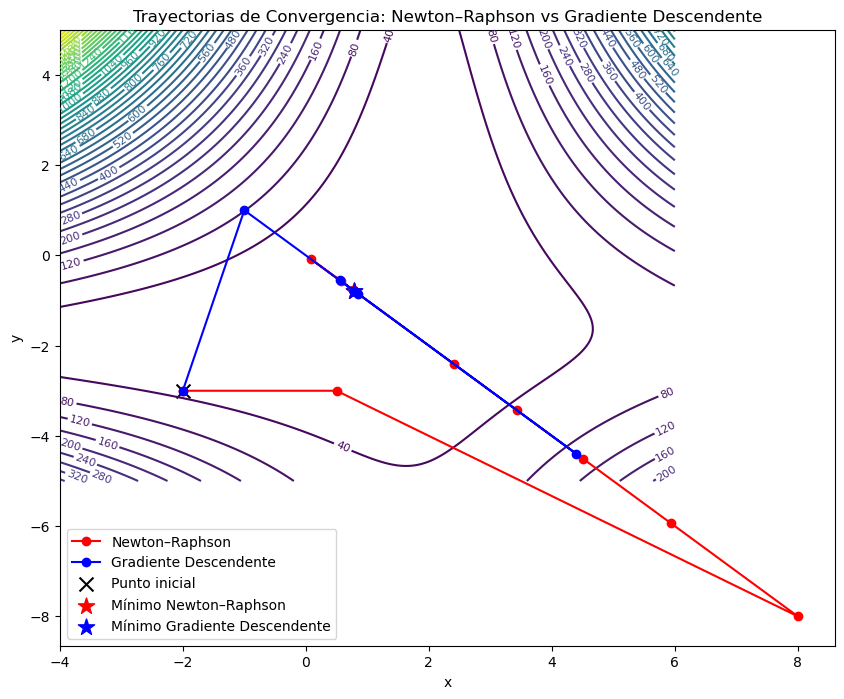

In [102]:
import numpy as np
import matplotlib.pyplot as plt

x_range = np.linspace(-4, 6, 400)
y_range = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = f_func(X, Y)

plt.figure(figsize=(10, 8))
# Graficar el mapa de contornos de la función objetivo
contours = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)

# Convertir las trayectorias a arreglos NumPy (si no se ha hecho aún)
newton_traj = np.array(newton_traj)
gd_traj = np.array(gd_traj)

# Graficar la trayectoria de Newton–Raphson
plt.plot(newton_traj[:, 0], newton_traj[:, 1], 'ro-', label='Newton–Raphson')
# Graficar la trayectoria de Gradiente Descendente
plt.plot(gd_traj[:, 0], gd_traj[:, 1], 'bo-', label='Gradiente Descendente')

# Marcar el punto inicial
plt.scatter(initial_point[0], initial_point[1], color='black', marker='x', s=100, label='Punto inicial')
# Marcar el mínimo aproximado obtenido con Newton–Raphson
plt.scatter(newton_result[0], newton_result[1], color='red', marker='*', s=150, label='Mínimo Newton–Raphson')
# Marcar el mínimo aproximado obtenido con Gradiente Descendente
plt.scatter(gd_result[0], gd_result[1], color='blue', marker='*', s=150, label='Mínimo Gradiente Descendente')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Trayectorias de Convergencia: Newton–Raphson vs Gradiente Descendente')
plt.legend()
plt.show()


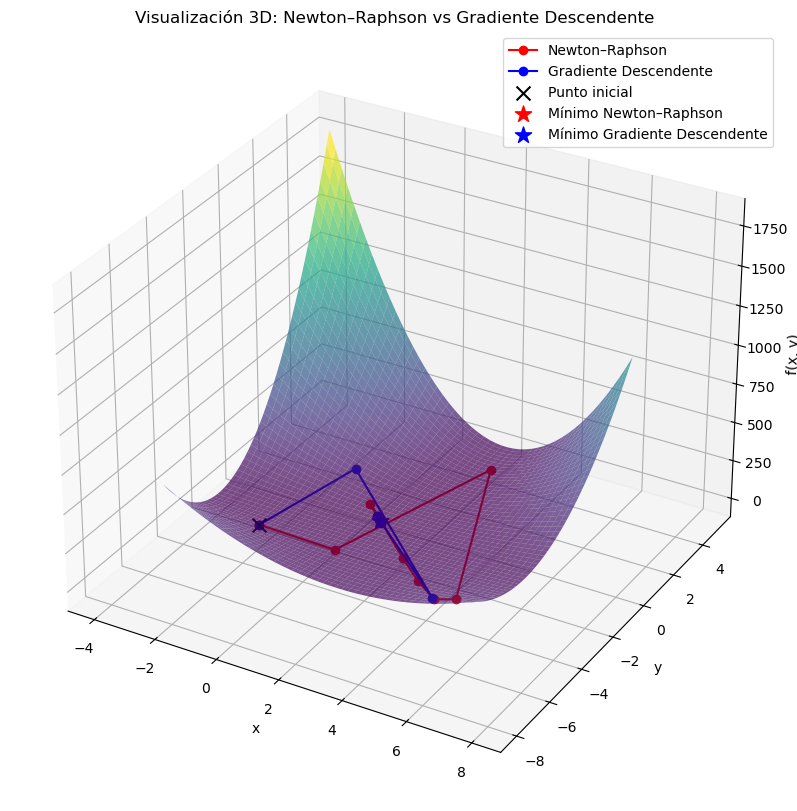

In [103]:
from mpl_toolkits.mplot3d import Axes3D  # Para gráficos 3D

# Crear una malla para graficar la superficie de f(x,y)
x_range = np.linspace(-4, 6, 400)
y_range = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = f_func(X, Y)  # f_func es la función numérica de f(x,y) definida previamente

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

# Convertir trayectorias a arreglos NumPy (si aún no lo están)
newton_traj = np.array(newton_traj)
gd_traj = np.array(gd_traj)

# Trayectoria de Newton–Raphson
x_newton = newton_traj[:, 0]
y_newton = newton_traj[:, 1]
z_newton = f_func(x_newton, y_newton)
ax.plot(x_newton, y_newton, z_newton, marker='o', color='red', label='Newton–Raphson')

# Trayectoria de Gradiente Descendente
x_gd = gd_traj[:, 0]
y_gd = gd_traj[:, 1]
z_gd = f_func(x_gd, y_gd)
ax.plot(x_gd, y_gd, z_gd, marker='o', color='blue', label='Gradiente Descendente')

# Marcar el punto inicial
init_z = f_func(initial_point[0], initial_point[1])
ax.scatter(initial_point[0], initial_point[1], init_z, color='black', marker='x', s=100, label='Punto inicial')

# Marcar los mínimos aproximados obtenidos por cada método
newton_min_z = f_func(newton_result[0], newton_result[1])
ax.scatter(newton_result[0], newton_result[1], newton_min_z, color='red', marker='*', s=150, label='Mínimo Newton–Raphson')

gd_min_z = f_func(gd_result[0], gd_result[1])
ax.scatter(gd_result[0], gd_result[1], gd_min_z, color='blue', marker='*', s=150, label='Mínimo Gradiente Descendente')

# Etiquetas y título
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Visualización 3D: Newton–Raphson vs Gradiente Descendente')
ax.legend()

plt.show()


### 6. Realizar un análisis comparativo

| Metodo | # de Iteraciones | Tiempo de Ejecución (seg) | Resultado |
|--------|------------------|---------------------|-----------|
| Newton-Raphson | 12 | 0.03300666809082031 | [ 0.78658834 -0.78658834]|
| Gradiente Descendente | 10 | 0.0010006427764892578 | [ 0.78658835 -0.78658835]|
| Analítico | N.A | N.A. | [0.7865883372, −0.7865883372] |

Podemos ver que el metodo de Gradiente Descendente logró converger en 10 iteraciones y en un tiempo de ejecución de 0.001 segundos, minetras que el metodo Newton-Raphson logro converger en 12 iteraciones y en un tiempo de 0.033 segundos. En ambos casos se logro alcanzar el minimo concido con una altisima precisión. Sin embargo, podemos ver que el metodo de Gradiente Descendente tuvo un menor tiempo de ejecución, lo cual se puede entender como un menor costo computacional con practicamente el mismo resultado. Por ultimo, ambos metodos muestran una alta sensibilidad a los parámetros de paso, Gradiente Descendente teniendo una mayor sensibilidad ya que con la variacion de $\alpha$ no logra converger luego de 1000 iteraciones mientras que Newton-Raphson si lo logra pero encunetra minimos bastante alejados del minimo conocido.

### 7. Concluir cuál método es más adecuado para esta función específica y argumentar bajo qué circunstancias generales sería preferible uno u otro método

El metodo más adecuado para esta función seria el de Gradiente Descendente por su bajo costo computacional y bajo numero de iteraciones al compararlo con el metodo Newton-Raphson. Sin embargo, este metodo tiene una baja resiliencia frente al parámetro $\alpha$. En circunstancias en la que el parámetro de entrada deba variar, se recomendaria más el uso del metodo Newton-Raphson.

### 8. Presentar una tabla comparativa que sintetice las ventajas y desventajas observadas para cada método en este problema particular

| |Ventajas| Desventajas|
|-|-------|------------|
| **Newton–Raphson**   | - Convergencia **cuadrática** cerca del óptimo (requiere en teoría menos iteraciones para alcanzar alta precisión).<br>- Útil en problemas de **pocas dimensiones**, donde invertir la Hessiana no es costoso.<br>- Puede ser muy rápido cuando la Hessiana está bien condicionada. | - **Costo computacional elevado** por iteración**, pues se requiere calcular e **invertir** la Hessiana.<br>- **Menor robustez global**: puede divergir si el punto inicial está lejos o si la Hessiana está mal condicionada.<br>- Sensible al factor \(\alpha\) si la Hessiana no es positiva definida. |
| **Gradiente Descendente** | - **Bajo costo computacional** por iteración (solo necesita el gradiente).<br>- **Más robusto globalmente**: es menos probable que diverja si se elige un \(\alpha\) razonable.<br>- **Escalable** a problemas de gran dimensión (no requiere la Hessiana). | - Convergencia **lineal** (más iteraciones para lograr la misma precisión).<br>- Muy **sensible** a la elección de \(\alpha\): si es muy grande, puede oscilar o divergir; si es muy pequeño, converge lentamente.<br>- Requiere a menudo métodos de búsqueda de línea o ajuste dinámico de \(\alpha\). |
